# EDA for Log Reports

In [12]:
from pathlib import Path

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read all csv files
df = pl.read_csv("../outputs/logs/**/*.csv")
print(df.shape)
df.head(5)

(53384, 3)


location,error_code,error_description
str,str,str
"""Line 14 Sent 2…","""L4 Morpho feat…","""Value Remt of …"
"""Line 50 Sent 6…","""L4 Morpho feat…","""Feature Case i…"
"""Line 63 Sent 7…","""L4 Morpho feat…","""Feature Case i…"
"""Line 75 Sent 8…","""L4 Morpho feat…","""Feature NumTyp…"
"""Line 76 Sent 8…","""L4 Morpho feat…","""Feature NumTyp…"


## What are the most common errors?

The most common error is the "L4 Morpho feature-upos-not-permitted." This happens when a UPOS tag is not in the current tag set of a language. The solution here is to edit the tag set in UD and include those missing tags. 

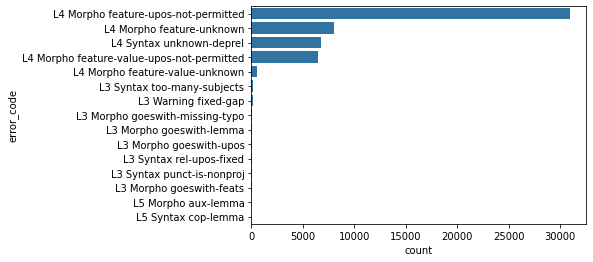

In [35]:
sns.barplot(
    df["error_code"].value_counts(sort=True).to_pandas(),
    x="count",
    y="error_code",
)
plt.savefig("figures/most_common_error.png", bbox_inches="tight", dpi=300) 

Some errors, such as `L4 Morpho feature-upos-not-permitted` and `L4 Morpho feature-value-upos-not-permitted` and `L4 Morpho feature-value-unknown`, look quite the same. According to the UD documentation, [L4 means "language-specific labels"](https://universaldependencies.org/validation-rules.html): 

> Morphological features (FEATS) and relation types (DEPREL and DEPS) allow language-specific extensions. Therefore the lower levels checked only the general format of these columns but not the actual labels. Level 4 assumes that we know the language of the data we are validating and we can check a list of available labels in a separate file. The current practice is that maintainers of treebanks of a given language collectively maintain the lists of labels for that language. A feature-value pair is considered valid if it is documented in the guidelines (either globally or specifically for the language) and it is specifically permitted with the given UPOS tag in the given language. A relation subtype is considered valid if it is documented and permitted (turned on) in the given language.

We then want to know what are the common missing UPOS features from our annotations.

In [20]:
has_l4 = df["error_code"].str.contains("L4")
df.filter(has_l4).head(5)

location,error_code,error_description
str,str,str
"""Line 14 Sent 2…","""L4 Morpho feat…","""Value Remt of …"
"""Line 50 Sent 6…","""L4 Morpho feat…","""Feature Case i…"
"""Line 63 Sent 7…","""L4 Morpho feat…","""Feature Case i…"
"""Line 75 Sent 8…","""L4 Morpho feat…","""Feature NumTyp…"
"""Line 76 Sent 8…","""L4 Morpho feat…","""Feature NumTyp…"


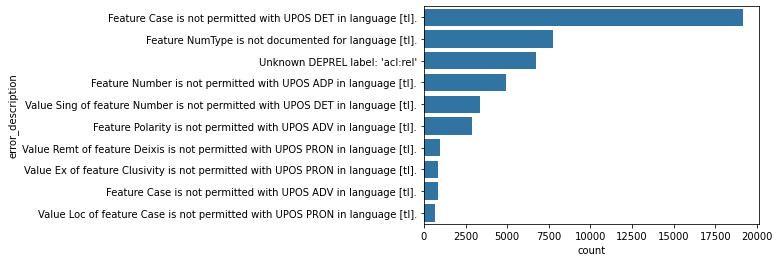

In [36]:
top_k = 10  # Let's get the top 10 for now
sns.barplot(
    df.filter(has_l4)["error_description"].value_counts(sort=True).head(top_k).to_pandas(),
    x="count",
    y="error_description",
)
plt.savefig("figures/top_10_l4_errors.png", bbox_inches="tight", dpi=300) 